In [2]:
! conda install -c rdkit rdkit -y

Channels:
 - rdkit
 - sean
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.3             |     pyhd3eb1b0_0          47 KB
    ca-certificates-2024.3.11  |       hca03da5_0         128 KB
    conda-24.3.0               |  py311hca03da5_0         1.2 MB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following packages will be UPDATED:

  archspec                               0.2.1-pyhd3eb1b0_0 --> 0.2.3-pyhd3eb1b0_0 
  ca-certificates    conda-forge::ca-certificates-2024.2.2~ --> pkgs/main::ca-certificates-2024.3.11-hca03da5_0 
  conda              conda-forge::conda-24.1.2-py311h267d0~ --> pkgs/main::conda-24.3.0-py31

In [22]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
     

In [23]:
import pandas as pd
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [24]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors
     

In [25]:
df_lipinski = lipinski(df.canonical_smiles)

In [26]:

df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,232.283,1.3532,2.0,3.0
1,253.301,2.7750,1.0,3.0
2,267.328,3.0780,0.0,3.0
3,324.775,2.8509,0.0,6.0
4,232.283,1.3532,2.0,3.0
5,251.329,3.5336,0.0,2.0
6,235.286,3.2941,0.0,2.0
7,224.263,2.6222,1.0,2.0
8,224.263,2.6222,1.0,2.0
9,316.441,4.0599,0.0,3.0


In [27]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,inactive,34000.0
1,CHEMBL93828,O=C1c2cccc(O)c2CCC1Cc1ccncc1,intermediate,2000.0
2,CHEMBL90427,COc1cccc2c1CCC(Cc1ccncc1)C2=O,intermediate,8000.0
3,CHEMBL100749,Cn1nnc2ccc(C(c3ccc(Cl)cc3)n3cncn3)cc21,active,3.0
4,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,intermediate,6200.0
5,CHEMBL294361,COc1ccc2c(c1)C1C(CC2)C1c1ccncc1,active,265.0
6,CHEMBL90585,O=C1/C(=C/c2ccncc2)CCc2ccccc21,intermediate,4600.0
7,CHEMBL168434,O=C1/C(=C/c2c[nH]cn2)CCc2ccccc21,active,170.0
8,CHEMBL169251,O=C1/C(=C\c2c[nH]cn2)CCc2ccccc21,active,260.0
9,CHEMBL3753401,C[C@@H]1OC(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4...,active,280.0


In [36]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,inactive,34000.0,232.283,1.3532,2.0,3.0
1,CHEMBL93828,O=C1c2cccc(O)c2CCC1Cc1ccncc1,intermediate,2000.0,253.301,2.7750,1.0,3.0
2,CHEMBL90427,COc1cccc2c1CCC(Cc1ccncc1)C2=O,intermediate,8000.0,267.328,3.0780,0.0,3.0
3,CHEMBL100749,Cn1nnc2ccc(C(c3ccc(Cl)cc3)n3cncn3)cc21,active,3.0,324.775,2.8509,0.0,6.0
4,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,intermediate,6200.0,232.283,1.3532,2.0,3.0
5,CHEMBL294361,COc1ccc2c(c1)C1C(CC2)C1c1ccncc1,active,265.0,251.329,3.5336,0.0,2.0
6,CHEMBL90585,O=C1/C(=C/c2ccncc2)CCc2ccccc21,intermediate,4600.0,235.286,3.2941,0.0,2.0
7,CHEMBL168434,O=C1/C(=C/c2c[nH]cn2)CCc2ccccc21,active,170.0,224.263,2.6222,1.0,2.0
8,CHEMBL169251,O=C1/C(=C\c2c[nH]cn2)CCc2ccccc21,active,260.0,224.263,2.6222,1.0,2.0
9,CHEMBL3753401,C[C@@H]1OC(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4...,active,280.0,316.441,4.0599,0.0,3.0


In [74]:

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

In [75]:
df_combined.standard_value.describe()

count       11.000000
mean      5093.454545
std       9992.655116
min          3.000000
25%        255.000000
50%        280.000000
75%       5400.000000
max      34000.000000
Name: standard_value, dtype: float64

In [76]:
-np.log10( (10**-9)* 100000000 )

1.0

In [77]:

-np.log10( (10**-9)* 10000000000 )

-1.0

In [78]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)  # Use axis=1 to drop columns

    return x


In [79]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,inactive,232.283,1.3532,2.0,3.0,34000.0
1,CHEMBL93828,O=C1c2cccc(O)c2CCC1Cc1ccncc1,intermediate,253.301,2.7750,1.0,3.0,2000.0
2,CHEMBL90427,COc1cccc2c1CCC(Cc1ccncc1)C2=O,intermediate,267.328,3.0780,0.0,3.0,8000.0
3,CHEMBL100749,Cn1nnc2ccc(C(c3ccc(Cl)cc3)n3cncn3)cc21,active,324.775,2.8509,0.0,6.0,3.0
4,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,intermediate,232.283,1.3532,2.0,3.0,6200.0
5,CHEMBL294361,COc1ccc2c(c1)C1C(CC2)C1c1ccncc1,active,251.329,3.5336,0.0,2.0,265.0
6,CHEMBL90585,O=C1/C(=C/c2ccncc2)CCc2ccccc21,intermediate,235.286,3.2941,0.0,2.0,4600.0
7,CHEMBL168434,O=C1/C(=C/c2c[nH]cn2)CCc2ccccc21,active,224.263,2.6222,1.0,2.0,170.0
8,CHEMBL169251,O=C1/C(=C\c2c[nH]cn2)CCc2ccccc21,active,224.263,2.6222,1.0,2.0,260.0
9,CHEMBL3753401,C[C@@H]1OC(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4...,active,316.441,4.0599,0.0,3.0,280.0


In [80]:
df_norm.standard_value_norm.describe()

count       11.000000
mean      5093.454545
std       9992.655116
min          3.000000
25%        255.000000
50%        280.000000
75%       5400.000000
max      34000.000000
Name: standard_value_norm, dtype: float64

In [81]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,inactive,232.283,1.3532,2.0,3.0,4.468521
1,CHEMBL93828,O=C1c2cccc(O)c2CCC1Cc1ccncc1,intermediate,253.301,2.7750,1.0,3.0,5.698970
2,CHEMBL90427,COc1cccc2c1CCC(Cc1ccncc1)C2=O,intermediate,267.328,3.0780,0.0,3.0,5.096910
3,CHEMBL100749,Cn1nnc2ccc(C(c3ccc(Cl)cc3)n3cncn3)cc21,active,324.775,2.8509,0.0,6.0,8.522879
4,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,intermediate,232.283,1.3532,2.0,3.0,5.207608
5,CHEMBL294361,COc1ccc2c(c1)C1C(CC2)C1c1ccncc1,active,251.329,3.5336,0.0,2.0,6.576754
6,CHEMBL90585,O=C1/C(=C/c2ccncc2)CCc2ccccc21,intermediate,235.286,3.2941,0.0,2.0,5.337242
7,CHEMBL168434,O=C1/C(=C/c2c[nH]cn2)CCc2ccccc21,active,224.263,2.6222,1.0,2.0,6.769551
8,CHEMBL169251,O=C1/C(=C\c2c[nH]cn2)CCc2ccccc21,active,224.263,2.6222,1.0,2.0,6.585027
9,CHEMBL3753401,C[C@@H]1OC(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4...,active,316.441,4.0599,0.0,3.0,6.552842


In [82]:
df_final.pIC50.describe()

count    11.000000
mean      6.128942
std       1.115168
min       4.468521
25%       5.272425
50%       6.552842
75%       6.593543
max       8.522879
Name: pIC50, dtype: float64

In [83]:
df_2class = df_final [df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,inactive,232.283,1.3532,2.0,3.0,4.468521
3,CHEMBL100749,Cn1nnc2ccc(C(c3ccc(Cl)cc3)n3cncn3)cc21,active,324.775,2.8509,0.0,6.0,8.522879
5,CHEMBL294361,COc1ccc2c(c1)C1C(CC2)C1c1ccncc1,active,251.329,3.5336,0.0,2.0,6.576754
7,CHEMBL168434,O=C1/C(=C/c2c[nH]cn2)CCc2ccccc21,active,224.263,2.6222,1.0,2.0,6.769551
8,CHEMBL169251,O=C1/C(=C\c2c[nH]cn2)CCc2ccccc21,active,224.263,2.6222,1.0,2.0,6.585027
9,CHEMBL3753401,C[C@@H]1OC(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4...,active,316.441,4.0599,0.0,3.0,6.552842
10,CHEMBL3754484,C[C@@H]1OC(=O)C[C@H]2[C@@H]3C=C[C@H]4C[C@@H](O...,active,318.457,3.7076,1.0,3.0,6.602060


In [84]:
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt


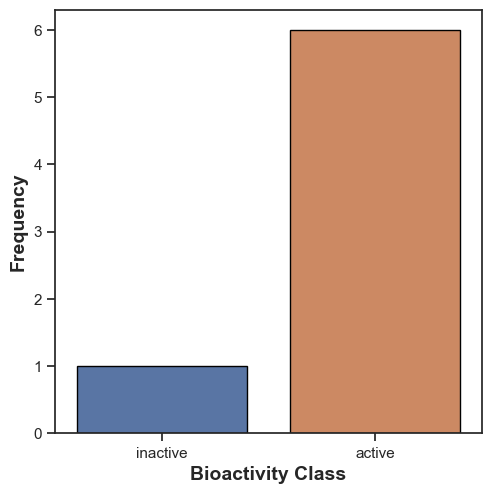

In [85]:
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x = 'bioactivity_class', data=df_2class, edgecolor = "black")

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize= 14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

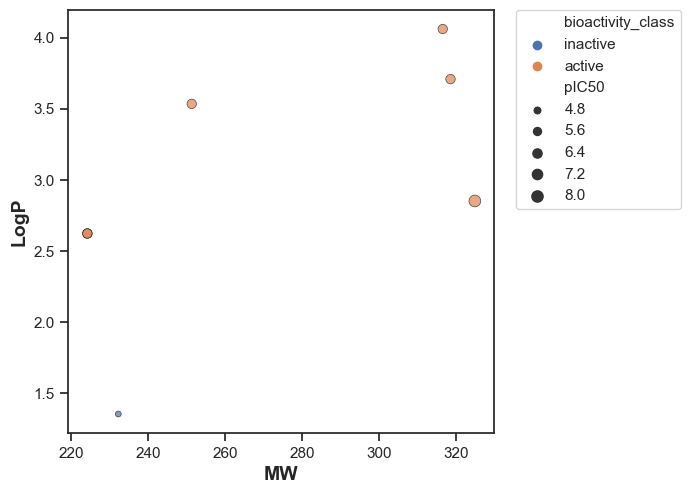

In [97]:
plt.figure(figsize=(5.5,5.5))

sns.scatterplot(x= 'MW' , y='LogP', data=df_2class, hue='bioactivity_class',size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')



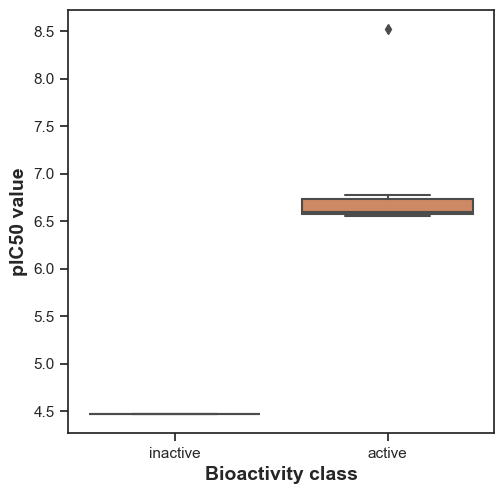

In [98]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [99]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results
     

In [100]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,6.0,0.285714,0.05,Same distribution (fail to reject H0)


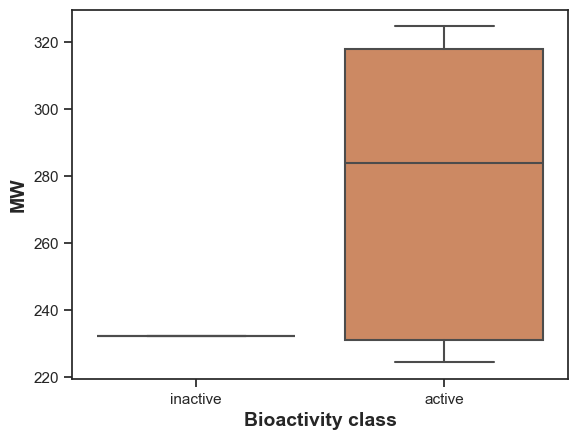

In [101]:

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [102]:
mannwhitney('MW')


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4.0,0.800838,0.05,Same distribution (fail to reject H0)


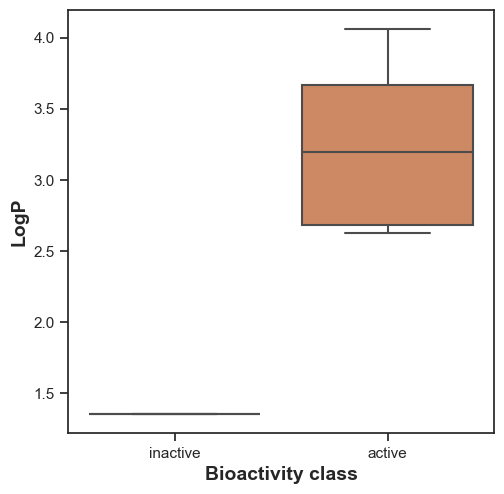

In [103]:


plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [104]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,6.0,0.207196,0.05,Same distribution (fail to reject H0)


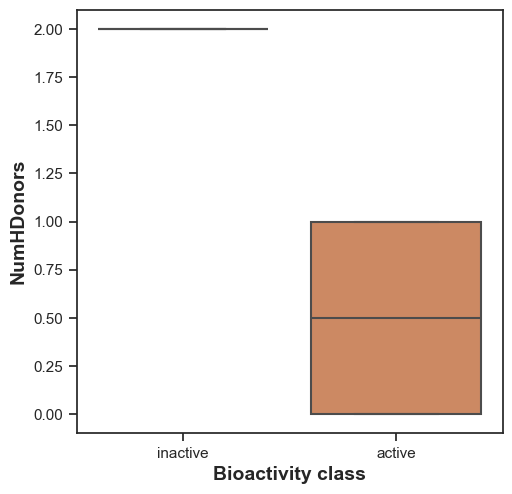

In [105]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [106]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,0.0,0.176966,0.05,Same distribution (fail to reject H0)


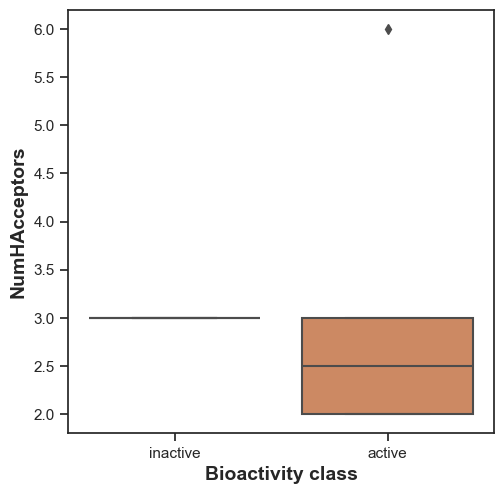

In [107]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [108]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2.0,0.787137,0.05,Same distribution (fail to reject H0)


In [109]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: bioactivity_data.csv (deflated 75%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: bioactivity_preprocessed_data.csv (deflated 57%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 13%)
  adding: plot_MW_vs_LogP.pdf (deflated 31%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
